In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from pandas.tseries.offsets import BMonthEnd
import datetime
import statsmodels.api as sm
from scipy.stats import ttest_1samp

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('data/return_pf_excess_ret_beta.csv',index_col=0)
df['date'] = pd.to_datetime(df['date'],format='%Y%m') + BMonthEnd()
df = df.set_index(['date','permno'])
df

ret        mktcap    rf  excess_ret  \
date       permno                                             
1926-01-29 10006   0.032732  6.615000e+04   NaN         NaN   
           10022   0.017857  1.140000e+04   NaN         NaN   
           10030   0.161667  2.718300e+04   NaN         NaN   
           10049   0.141892  2.087500e+04   NaN         NaN   
           10057  -0.035714  5.906250e+03   NaN         NaN   
...                     ...           ...   ...         ...   
2022-03-31 93426   0.023559  4.054758e+05  0.01    0.013559   
           93427   0.049935  3.889284e+06  0.01    0.039935   
           93429  -0.024469  1.219740e+07  0.01   -0.034469   
           93434  -0.073913  8.287404e+04  0.01   -0.083913   
           93436   0.238009  1.113736e+09  0.01    0.228009   

                   benchmark_excess_ret    beta_5   beta_10   beta_20  \
date       permno                                                       
1926-01-29 10006               0.000000       NaN       NaN       NaN   
           10022               0.000000       NaN       NaN       NaN   
           10030               0.000000       NaN       NaN       NaN   
           10049               0.000000       NaN       NaN       NaN   
           10057               0.000000       NaN       NaN       NaN   
...                                 ...       ...       ...       ...   
2022-03-31 93426               0.031048  1.289819  1.196555  1.162551   
           93427               0.031048  1.119160  0.763804  0.859076   
           93429               0.031048  0.640248  0.905225  0.963663   
           93434               0.031048  2.209166  2.623052  1.460519   
           93436               0.031048  3.728205  2.899511  1.887399   

                    beta_30  
date       permno            
1926-01-29 10006        NaN  
           10022        NaN  
           10030        NaN  
           10049        NaN  
           10057        NaN  
...                     ...  
2022-03-31 93426   1.129329  
           93427   0.903141  
           93429   0.948496  
           93434   1.185026  
           93436   1.664232  

[4652777 rows x 9 columns]

In [4]:
spec_df = pd.read_pickle('data/specific_returns_halflife36_TOP2000.pkl')
spec_df = spec_df.stack()
spec_df.loc['1980-01-01':]


            permno
1980-01-31  10006     0.122766
            10057     0.193021
            10065     0.040370
            10137    -0.072791
            10145     0.058407
                        ...   
2022-03-31  93419     0.057479
            93423    -0.027426
            93427     0.035173
            93429    -0.046218
            93436     0.143481
Length: 1006577, dtype: float64

In [5]:
df['spec_ret'] = spec_df
for col_name in tqdm(['beta_5','beta_10','beta_20','beta_30']):
    tmp = df[col_name].unstack()
    tmp = tmp.shift(1)
    tmp = tmp.stack()
    df[col_name+"_lag"] = tmp
df

  0%|          | 0/4 [00:00<?, ?it/s]

ret        mktcap    rf  excess_ret  \
date       permno                                             
1926-01-29 10006   0.032732  6.615000e+04   NaN         NaN   
           10022   0.017857  1.140000e+04   NaN         NaN   
           10030   0.161667  2.718300e+04   NaN         NaN   
           10049   0.141892  2.087500e+04   NaN         NaN   
           10057  -0.035714  5.906250e+03   NaN         NaN   
...                     ...           ...   ...         ...   
2022-03-31 93426   0.023559  4.054758e+05  0.01    0.013559   
           93427   0.049935  3.889284e+06  0.01    0.039935   
           93429  -0.024469  1.219740e+07  0.01   -0.034469   
           93434  -0.073913  8.287404e+04  0.01   -0.083913   
           93436   0.238009  1.113736e+09  0.01    0.228009   

                   benchmark_excess_ret    beta_5   beta_10   beta_20  \
date       permno                                                       
1926-01-29 10006               0.000000       NaN       NaN       NaN   
           10022               0.000000       NaN       NaN       NaN   
           10030               0.000000       NaN       NaN       NaN   
           10049               0.000000       NaN       NaN       NaN   
           10057               0.000000       NaN       NaN       NaN   
...                                 ...       ...       ...       ...   
2022-03-31 93426               0.031048  1.289819  1.196555  1.162551   
           93427               0.031048  1.119160  0.763804  0.859076   
           93429               0.031048  0.640248  0.905225  0.963663   
           93434               0.031048  2.209166  2.623052  1.460519   
           93436               0.031048  3.728205  2.899511  1.887399   

                    beta_30  spec_ret  beta_5_lag  beta_10_lag  beta_20_lag  \
date       permno                                                             
1926-01-29 10006        NaN       NaN         NaN          NaN          NaN   
           10022        NaN       NaN         NaN          NaN          NaN   
           10030        NaN       NaN         NaN          NaN          NaN   
           10049        NaN       NaN         NaN          NaN          NaN   
           10057        NaN       NaN         NaN          NaN          NaN   
...                     ...       ...         ...          ...          ...   
2022-03-31 93426   1.129329       NaN    1.370164     1.210224     1.167452   
           93427   0.903141  0.035173    0.902674     0.712518     0.850153   
           93429   0.948496 -0.046218    1.047012     1.048456     1.001944   
           93434   1.185026       NaN    3.397913     2.959594     1.536929   
           93436   1.664232  0.143481    2.646297     2.556310     1.800245   

                   beta_30_lag  
date       permno               
1926-01-29 10006           NaN  
           10022           NaN  
           10030           NaN  
           10049           NaN  
           10057           NaN  
...                        ...  
2022-03-31 93426      1.133371  
           93427      0.898269  
           93429      0.972102  
           93434      1.232479  
           93436      1.613183  

[4652777 rows x 14 columns]

In [6]:
initial_date = datetime.date(1970,1,1) + BMonthEnd()
validation_final_date = datetime.date(1999,12,1) + BMonthEnd()

df_train = df[(df.index.get_level_values('date') <= validation_final_date)&(df.index.get_level_values('date') >= initial_date)]
df_test = df[(df.index.get_level_values('date') > validation_final_date)]

In [7]:
def shrink_beta(beta,weight=0.5,target=1):
    return weight*beta + (1-weight)*target

def sigmoid_beta(beta):
    return 1/(1+np.exp(np.minimum(np.maximum(-(beta-1),-10),10)))

def z_score(beta,clip=None,iqr=False):
    z = (beta - np.mean(beta))
    if iqr:
        z/= np.quantile(beta,0.75) - np.quantile(beta,0.25)
    else:
        z/=np.std(beta)
    if clip:
        z = np.maximum(z,clip[0])
        z = np.minimum(z,clip[1])
    return z

## Train

In [240]:
reg_results = dict(zip(['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag'],[[] for i in range(4)]))

for i,date in tqdm(enumerate(df_train.index.get_level_values('date').unique())):
    if i<=60:
        continue
    X = df_train.loc[date,['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']].dropna()
    y = df_train.loc[date,'spec_ret'].dropna()
    # X,y = X.align(y,join='inner',axis=0)
    for col in ['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']:
        cur_X = X[[col]]
        # cur_X = cur_X.clip(-3,4)
        cur_X= shrink_beta(cur_X)
        # cur_X = sigmoid_beta(cur_X)
        cur_X= z_score(cur_X,clip=(-5,5),iqr=False)
        # cur_X = cur_X.rank(axis=0,numeric_only=True,pct=True,ascending=True)

        cur_X,cur_y = cur_X.align(y,join='inner',axis=0)
        # cur_y=y


        # res = sm.OLS(cur_y,sm.add_constant(cur_X)).fit()
        res = sm.RLM(cur_y,sm.add_constant(cur_X), M=sm.robust.norms.HuberT()).fit(scale_est=sm.robust.scale.HuberScale())
        y_pred = res.predict(sm.add_constant(cur_X))
        # display(res.summary())
        res_ser = pd.Series({
            "const": res.params.const,
            "coef": res.params[col],
            "t_stat": res.tvalues[col],
            # "r2": res.rsquared
            "r2": 1 - np.var(cur_y-y_pred)/np.var(cur_y)
        },name=date)
        reg_results[col].append(res_ser)

0it [00:00, ?it/s]

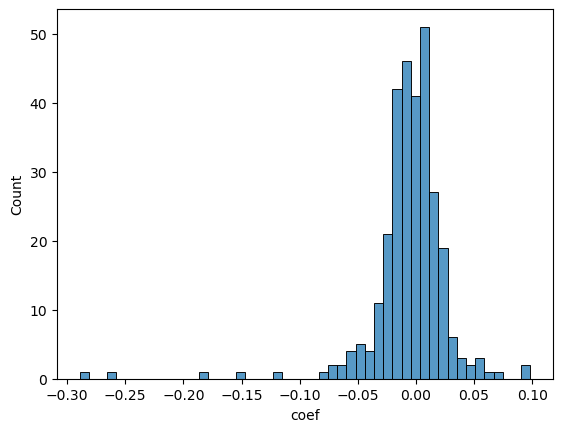

-0.006158550476283008
Ttest_1sampResult(statistic=-2.4222949093734214, pvalue=0.016167580957578327)


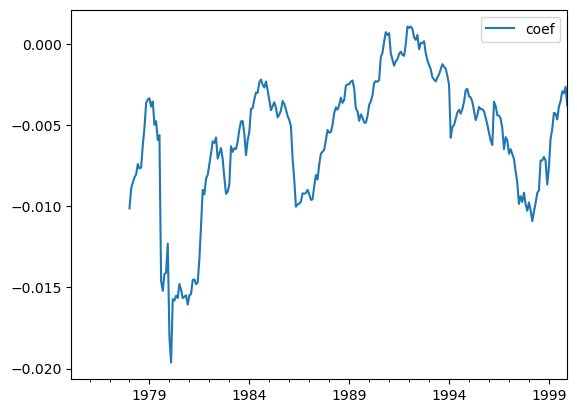

In [241]:
tmp = pd.DataFrame(reg_results['beta_30_lag'])['coef'].loc['1975-01-01':]
sns.histplot(tmp)
plt.show()
tmp.ewm(36,min_periods=36).mean().plot(legend=True)
print(tmp.mean())
print(ttest_1samp(pd.DataFrame(reg_results['beta_30_lag'])['coef'].loc['1980-01-01':'2000-01-01'],0))

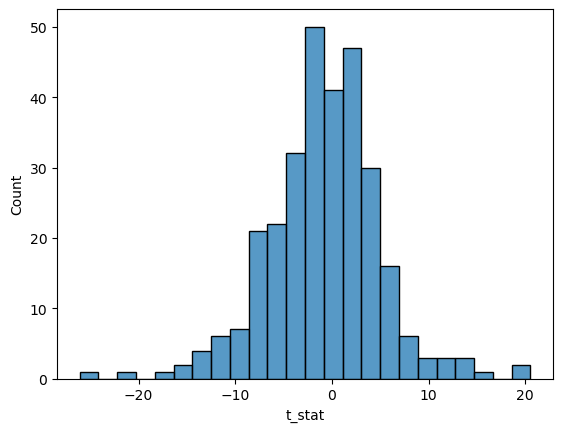

-0.8974282999793609


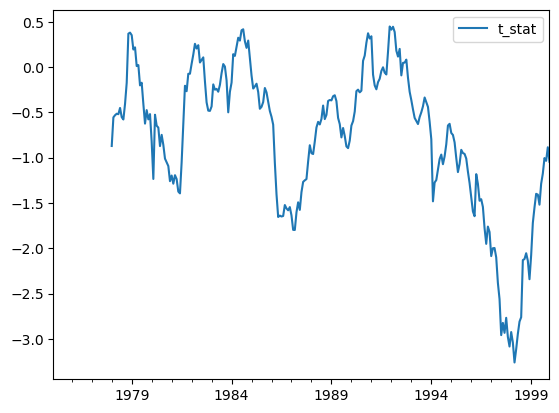

In [242]:
tmp = pd.DataFrame(reg_results['beta_30_lag'])['t_stat'].loc['1975-01-01':]
sns.histplot(tmp)
plt.show()
tmp.ewm(36,min_periods=36).mean().plot(legend=True)
print(tmp.mean())

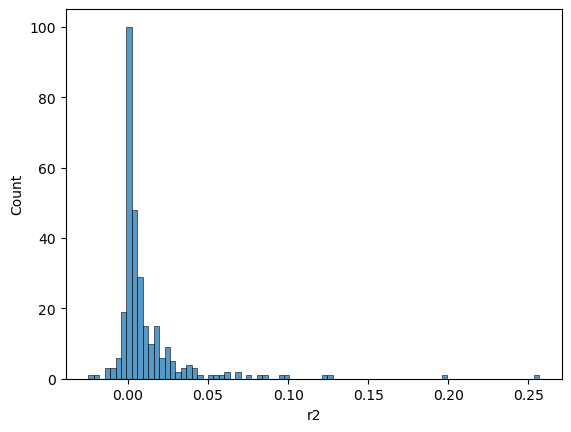

0.011309288488306063


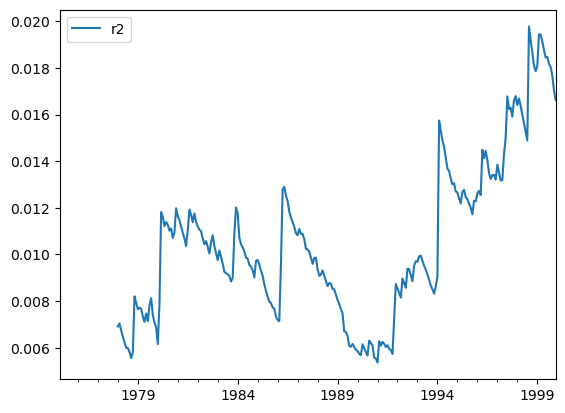

In [243]:
tmp = pd.DataFrame(reg_results['beta_30_lag'])['r2'].loc['1975-01-01':]
sns.histplot(tmp)
plt.show()
tmp.ewm(36,min_periods=36).mean().plot(legend=True)
print(tmp.mean())

## Output Full Dataset of Expected Returns

In [9]:
df_output = df[df.index.get_level_values('date') >= initial_date]

In [10]:
reg_results = dict(zip(['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag'],[[] for i in range(4)]))

for i,date in tqdm(enumerate(df_output.index.get_level_values('date').unique())):
    X = df_output.loc[date,['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']].dropna()
    y = df_output.loc[date,'spec_ret'].dropna()
    # X,y = X.align(y,join='inner',axis=0)
    for col in ['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']:
        cur_X = X[[col]]
        # cur_X = cur_X.clip(-3,4)
        cur_X= shrink_beta(cur_X)
        # cur_X = sigmoid_beta(cur_X)
        cur_X= z_score(cur_X,clip=(-5,5),iqr=False)
        # cur_X = cur_X.rank(axis=0,numeric_only=True,pct=True,ascending=True)

        cur_X,cur_y = cur_X.align(y,join='inner',axis=0)
        # cur_y=y


        # res = sm.OLS(cur_y,sm.add_constant(cur_X)).fit()
        res = sm.RLM(cur_y,sm.add_constant(cur_X), M=sm.robust.norms.HuberT()).fit(scale_est=sm.robust.scale.HuberScale())
        y_pred = res.predict(sm.add_constant(cur_X))
        # display(res.summary())
        res_ser = pd.Series({
            "const": res.params.const,
            "coef": res.params[col],
            "t_stat": res.tvalues[col],
            # "r2": res.rsquared
            "r2": 1 - np.var(cur_y-y_pred)/np.var(cur_y)
        },name=date)
        reg_results[col].append(res_ser)

0it [00:00, ?it/s]

In [11]:
lst = []
for col in ['beta_5_lag','beta_10_lag','beta_20_lag','beta_30_lag']:
    lst.append(pd.DataFrame(reg_results[col])['coef'].ewm(36).mean().rename(col+"_coef"))
coef_df = pd.concat(lst,axis=1)
coef_df

,beta_5_lag_coef,beta_10_lag_coef,beta_20_lag_coef,beta_30_lag_coef
1970-01-30,0.004791,-0.001635,-0.005636,-0.006767
1970-02-27,-0.017353,-0.021690,-0.022302,-0.021475
1970-03-31,-0.007479,-0.021291,-0.025486,-0.024667
1970-04-30,-0.003862,-0.037758,-0.040157,-0.037049
1970-05-29,0.002632,-0.020835,-0.020971,-0.018526
...,...,...,...,...
2021-11-30,-0.007240,-0.010186,-0.011546,-0.012334
2021-12-31,-0.007603,-0.010939,-0.012849,-0.013587
2022-01-31,-0.007448,-0.010497,-0.012015,-0.012641
2022-02-28,-0.007095,-0.009954,-0.011135,-0.011733


In [12]:
ex_returns_lst = []
for i,date in tqdm(enumerate(df_output.index.get_level_values('date').unique())):
    X = df_output.loc[date,['beta_5','beta_10','beta_20','beta_30']].dropna()
    coef = coef_df.loc[date]
    concat_lst = []
    for col in ['beta_5','beta_10','beta_20','beta_30']:
        concat_lst.append((X[col]*coef[col+"_lag_coef"]).rename(col+"_exalpha"))
    ex_returns = pd.concat(concat_lst,axis=1)
    ex_returns['date'] = date
    ex_returns = ex_returns.set_index('date',append=True).reorder_levels([1,0])
    ex_returns_lst.append(ex_returns)
ex_returns_df = pd.concat(ex_returns_lst,axis=0)
ex_returns_df

0it [00:00, ?it/s]

beta_5_exalpha  beta_10_exalpha  beta_20_exalpha  \
date       permno                                                     
1970-01-30 10006         0.005168        -0.001647        -0.005648   
           10014        -0.006893         0.000382        -0.003327   
           10057         0.003673        -0.001253        -0.004817   
           10065         0.006714        -0.001955        -0.006215   
           10102         0.003623        -0.001488        -0.005700   
...                           ...              ...              ...   
2022-03-31 93426        -0.010052        -0.012957        -0.013653   
           93427        -0.008722        -0.008271        -0.010089   
           93429        -0.004990        -0.009803        -0.011317   
           93434        -0.017217        -0.028405        -0.017153   
           93436        -0.029056        -0.031399        -0.022166   

                   beta_30_exalpha  
date       permno                   
1970-01-30 10006         -0.006816  
           10014         -0.005628  
           10057         -0.006099  
           10065         -0.007258  
           10102         -0.007058  
...                            ...  
2022-03-31 93426         -0.013578  
           93427         -0.010859  
           93429         -0.011404  
           93434         -0.014248  
           93436         -0.020009  

[4049541 rows x 4 columns]

In [13]:
ex_returns_df_traded_dt = ex_returns_df['beta_30_exalpha']#.unstack().shift(1).stack()
ex_returns_df_traded_dt

date        permno
1970-01-30  10006    -0.006816
            10014    -0.005628
            10057    -0.006099
            10065    -0.007258
            10102    -0.007058
                        ...   
2022-03-31  93426    -0.013578
            93427    -0.010859
            93429    -0.011404
            93434    -0.014248
            93436    -0.020009
Name: beta_30_exalpha, Length: 4049541, dtype: float64

In [14]:
ex_returns_df_traded_dt.to_pickle('data/exalpha_beta_30.pkl')